In [1]:
import numpy as np # linear algebra
import pandas as pd# data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/school-student-daily-attendance/2018-2019_Daily_Attendance_20240429.csv


## Loading the dataset

In [2]:
raw_data = pd.read_csv('/kaggle/input/school-student-daily-attendance/2018-2019_Daily_Attendance_20240429.csv')
raw_data.head(10)

,School DBN,Date,Enrolled,Absent,Present,Released
0,01M015,20180905,172,19,153,0
1,01M015,20180906,171,17,154,0
2,01M015,20180907,172,14,158,0
3,01M015,20180912,173,7,166,0
4,01M015,20180913,173,9,164,0
5,01M015,20180914,173,11,162,0
6,01M015,20180917,173,10,163,0
7,01M015,20180918,174,7,167,0
8,01M015,20180920,174,7,167,0
9,01M015,20180921,174,8,166,0


## Preprocessing

In [3]:
raw_data.describe(include='all')

,School DBN,Date,Enrolled,Absent,Present,Released
count,277153,2.771530e+05,277153.00000,277153.000000,277153.000000,277153.000000
unique,1583,NaN,NaN,NaN,NaN,NaN
top,79X695,NaN,NaN,NaN,NaN,NaN
freq,179,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.018665e+07,596.98617,50.503538,544.499403,1.983229
std,NaN,4.555413e+03,482.90966,54.329671,452.970313,35.114511
min,NaN,2.018090e+07,1.00000,0.000000,1.000000,0.000000
25%,NaN,2.018111e+07,329.00000,23.000000,291.000000,0.000000
50%,NaN,2.019013e+07,476.00000,38.000000,430.000000,0.000000
75%,NaN,2.019041e+07,684.00000,59.000000,640.000000,0.000000


In [4]:
raw_data.isnull().sum()
# null value is absent in this datasets

School DBN    0
Date          0
Enrolled      0
Absent        0
Present       0
Released      0
dtype: int64

In [5]:
# 'Date' is in int64 format. We need to convert it into datetime
data = raw_data.copy()
data['Date'] = pd.to_datetime(raw_data['Date'], format = '%Y%m%d')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277153 entries, 0 to 277152
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   School DBN  277153 non-null  object        
 1   Date        277153 non-null  datetime64[ns]
 2   Enrolled    277153 non-null  int64         
 3   Absent      277153 non-null  int64         
 4   Present     277153 non-null  int64         
 5   Released    277153 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 12.7+ MB


In [6]:
data2= data.copy()
data2['Present%'] = ((data2['Present']/data2['Enrolled'])*100).round(2)
data2['Absent%']= 100-data2['Present%']
data2['Released%'] = ((data2['Released']/data2['Enrolled'])*100).round(2)
data2['Weekday'] = data2['Date'].dt.day_name()
data2

,School DBN,Date,Enrolled,Absent,Present,Released,Present%,Absent%,Released%,Weekday
0,01M015,2018-09-05,172,19,153,0,88.95,11.05,0.00,Wednesday
1,01M015,2018-09-06,171,17,154,0,90.06,9.94,0.00,Thursday
2,01M015,2018-09-07,172,14,158,0,91.86,8.14,0.00,Friday
3,01M015,2018-09-12,173,7,166,0,95.95,4.05,0.00,Wednesday
4,01M015,2018-09-13,173,9,164,0,94.80,5.20,0.00,Thursday
...,...,...,...,...,...,...,...,...,...,...
277148,79X695,2019-06-20,230,46,136,48,59.13,40.87,20.87,Thursday
277149,79X695,2019-06-21,226,53,128,45,56.64,43.36,19.91,Friday
277150,79X695,2019-06-24,226,42,130,54,57.52,42.48,23.89,Monday
277151,79X695,2019-06-25,226,56,127,43,56.19,43.81,19.03,Tuesday


In [7]:
list(data2.columns)

['School DBN',
 'Date',
 'Enrolled',
 'Absent',
 'Present',
 'Released',
 'Present%',
 'Absent%',
 'Released%',
 'Weekday']

In [8]:
data2 = data2[['School DBN',
 'Date',
 'Weekday',
 'Enrolled',
 'Absent',
 'Present',
 'Released',
 'Absent%',
 'Present%',
 'Released%']]
# let's see how the data is look like now
data2.head(10)

,School DBN,Date,Weekday,Enrolled,Absent,Present,Released,Absent%,Present%,Released%
0,01M015,2018-09-05,Wednesday,172,19,153,0,11.05,88.95,0.0
1,01M015,2018-09-06,Thursday,171,17,154,0,9.94,90.06,0.0
2,01M015,2018-09-07,Friday,172,14,158,0,8.14,91.86,0.0
3,01M015,2018-09-12,Wednesday,173,7,166,0,4.05,95.95,0.0
4,01M015,2018-09-13,Thursday,173,9,164,0,5.20,94.80,0.0
5,01M015,2018-09-14,Friday,173,11,162,0,6.36,93.64,0.0
6,01M015,2018-09-17,Monday,173,10,163,0,5.78,94.22,0.0
7,01M015,2018-09-18,Tuesday,174,7,167,0,4.02,95.98,0.0
8,01M015,2018-09-20,Thursday,174,7,167,0,4.02,95.98,0.0
9,01M015,2018-09-21,Friday,174,8,166,0,4.60,95.40,0.0


## Exploratory Data Analysis

In [9]:
data2.describe(include='all')

,School DBN,Date,Weekday,Enrolled,Absent,Present,Released,Absent%,Present%,Released%
count,277153,277153,277153,277153.00000,277153.000000,277153.000000,277153.000000,277153.000000,277153.000000,277153.000000
unique,1583,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,79X695,NaN,Wednesday,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,179,NaN,60820,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2019-01-28 12:18:24.343088128,NaN,596.98617,50.503538,544.499403,1.983229,10.207912,89.792088,0.324838
min,NaN,2018-09-04 00:00:00,NaN,1.00000,0.000000,1.000000,0.000000,0.000000,0.050000,0.000000
25%,NaN,2018-11-13 00:00:00,NaN,329.00000,23.000000,291.000000,0.000000,4.880000,88.170000,0.000000
50%,NaN,2019-01-29 00:00:00,NaN,476.00000,38.000000,430.000000,0.000000,7.410000,92.590000,0.000000
75%,NaN,2019-04-10 00:00:00,NaN,684.00000,59.000000,640.000000,0.000000,11.830000,95.120000,0.000000
max,NaN,2019-06-26 00:00:00,NaN,5955.00000,2151.000000,5847.000000,5904.000000,99.950000,100.000000,99.940000


**Average enrollment: 597**

**Average Present Rate: 89.79%**

**Average Absent Rate: 10.21%**

**Average Released Rate: 0.325%**

Here we can see that there are 1583 unique value in 'School DBN'. We can conclude that there are 1583 schools. The data is from **4 September, 2018 to 26 June, 2019 - a span of one year**.

In [10]:
# Let's see top 20 school based on enrollment in a single day
max_enrolled = data2.groupby('School DBN')['Enrolled'].max()
max_enrolled_sorted = max_enrolled.sort_values(ascending = False)
top_20_schools = max_enrolled_sorted.head(20)
top_20_schools
df_t20 = top_20_schools.to_frame()
df_t20 = df_t20.reset_index()
df_t20m = df_t20.merge(data2, how = 'inner', on=['School DBN', 'Enrolled'])
df_t20m


,School DBN,Enrolled,Date,Weekday,Absent,Present,Released,Absent%,Present%,Released%
0,13K430,5955,2018-09-05,Wednesday,124,5831,0,2.08,97.92,0.00
1,20K490,4600,2018-09-05,Wednesday,610,3990,0,13.26,86.74,0.00
2,26Q430,4507,2018-09-05,Wednesday,382,4125,0,8.48,91.52,0.00
3,22K405,4234,2018-09-05,Wednesday,309,3925,0,7.30,92.70,0.00
4,22K425,3891,2018-09-05,Wednesday,403,3487,1,10.38,89.62,0.03
5,28Q440,3801,2018-09-17,Monday,289,3512,0,7.60,92.40,0.00
6,28Q440,3801,2018-10-18,Thursday,266,3535,0,7.00,93.00,0.00
7,21K525,3750,2018-09-12,Wednesday,226,3524,0,6.03,93.97,0.00
8,26Q415,3668,2018-09-05,Wednesday,605,3063,0,16.49,83.51,0.00
9,31R455,3661,2019-01-30,Wednesday,250,3407,4,6.94,93.06,0.11


Text(0.5, 1.0, 'Top 20 schools having maximum enrollment in a single day')

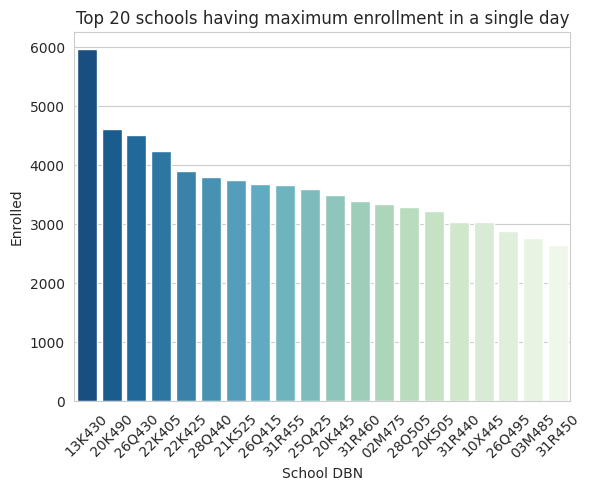

In [11]:
sns.set_style('whitegrid')
sns.barplot(x='School DBN', y='Enrolled', data=df_t20m, palette='GnBu_r').tick_params(axis='x', labelrotation=45)
plt.title("Top 20 schools having maximum enrollment in a single day")


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Maximum enrolled days')

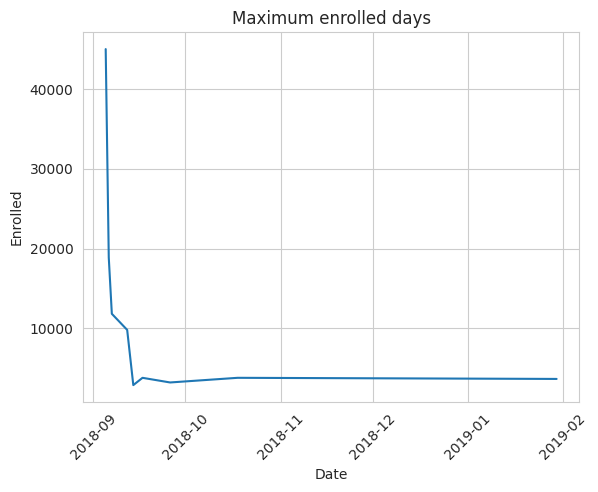

In [12]:
sns.lineplot(x='Date', y='Enrolled', data=df_t20m, estimator=sum ,errorbar=None).tick_params(axis='x', labelrotation=45)
plt.title("Maximum enrolled days")

In [13]:
# Let's see top 20 school having minimum enrollment in a single day
min_enrolled = data2.groupby('School DBN')['Enrolled'].min()
min_enrolled_sorted = min_enrolled.sort_values(ascending = True)
top_l20_schools = min_enrolled_sorted.head(20)
top_l20_schools
df_l20 = top_l20_schools.to_frame()
df_l20 = df_l20.reset_index()
df_l20m = df_l20.merge(data2, how = 'inner', on=['School DBN', 'Enrolled'])
df_l20m

,School DBN,Enrolled,Date,Weekday,Absent,Present,Released,Absent%,Present%,Released%
0,08X519,1,2018-09-05,Wednesday,0,1,0,0.00,100.00,0.0
1,12X092,1,2018-09-05,Wednesday,0,1,0,0.00,100.00,0.0
2,15K896,14,2018-09-05,Wednesday,0,14,0,0.00,100.00,0.0
3,79M331,15,2018-09-05,Wednesday,2,13,0,13.33,86.67,0.0
4,79M331,15,2018-09-06,Thursday,4,11,0,26.67,73.33,0.0
...,...,...,...,...,...,...,...,...,...,...
103,16K688,102,2018-11-07,Wednesday,8,94,0,7.84,92.16,0.0
104,28Q338,103,2018-09-05,Wednesday,30,73,0,29.13,70.87,0.0
105,06M349,105,2018-09-05,Wednesday,26,79,0,24.76,75.24,0.0
106,06M349,105,2018-09-06,Thursday,16,89,0,15.24,84.76,0.0


Text(0.5, 1.0, 'Top 20 schools having minimum enrollment in a single day')

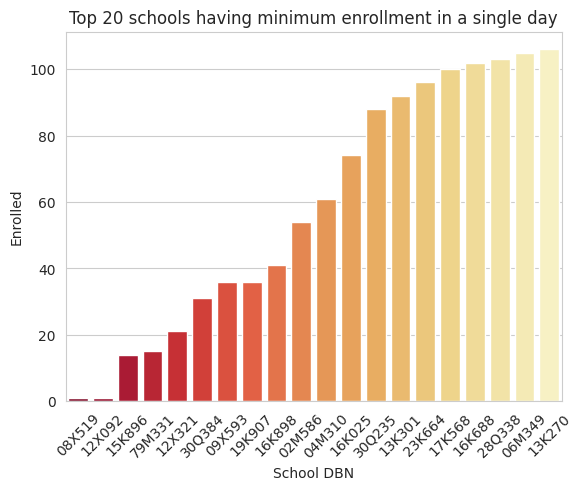

In [14]:
sns.barplot(x='School DBN', y='Enrolled', data=df_l20m, palette='YlOrRd_r').tick_params(axis='x', labelrotation=45)
plt.title("Top 20 schools having minimum enrollment in a single day")

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Minimum enrolled days')

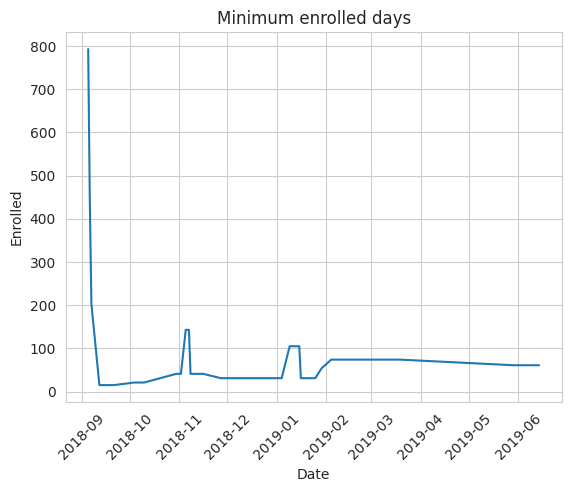

In [15]:
sns.lineplot(x='Date', y='Enrolled', data=df_l20m, estimator=sum ,errorbar=None).tick_params(axis='x', labelrotation=45)
plt.title("Minimum enrolled days")

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Absent percentages in 2018-19 NY school year')

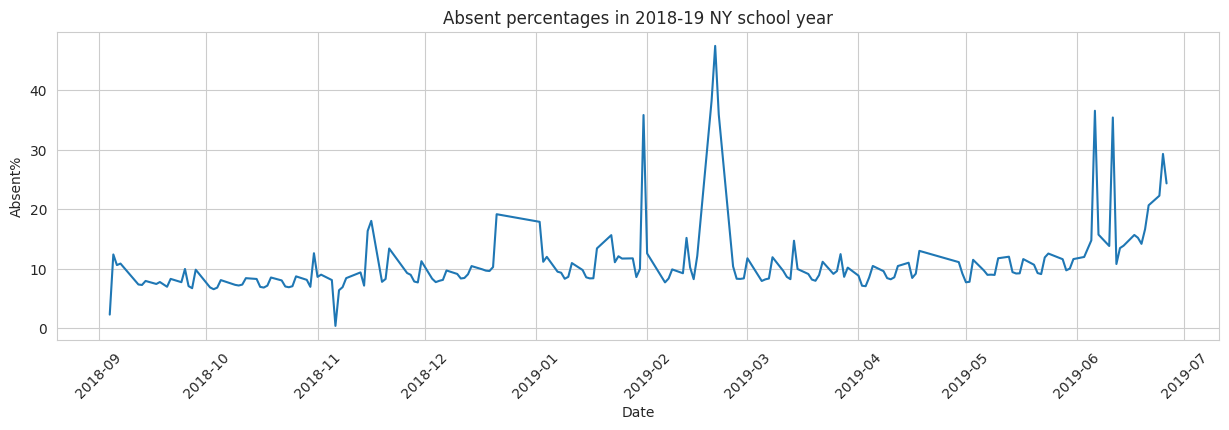

In [16]:
fig, ax = plt.subplots(figsize=(15, 4)) #width=10, height=4
sns.lineplot(x='Date', y='Absent%', data=data2, errorbar=None, ax=ax).tick_params(axis='x', labelrotation=45)
plt.title("Absent percentages in 2018-19 NY school year")

**Peak Absent days**
* Mid November 
* Second half of December
* Last week of January
* Third week of February
* Whole month of June

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


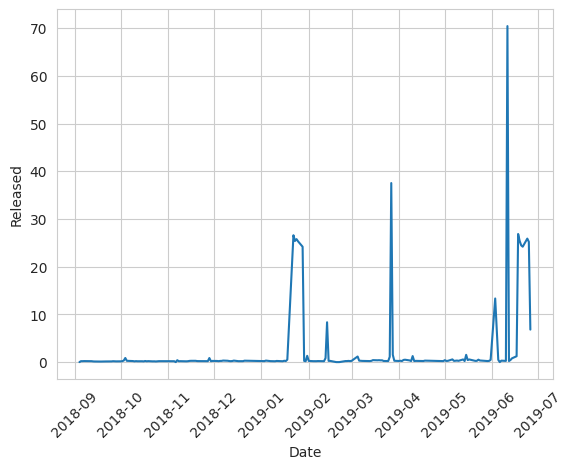

In [17]:
sns.lineplot(x='Date', y='Released', data=data2 ,errorbar=None).tick_params(axis='x', labelrotation=45)

**Peak Released days**
* Third week of January
* Last week of March
* Whole month of June

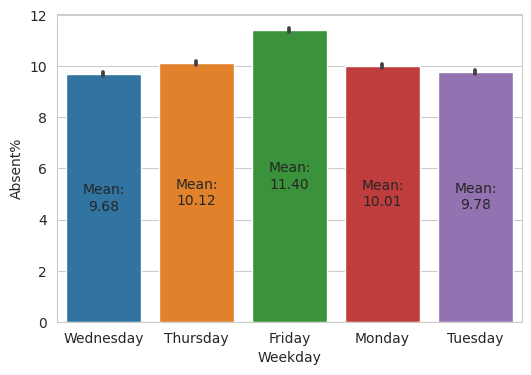

In [18]:
fig, ax = plt.subplots(figsize=(6, 4))
sns.barplot(data=data2, x='Weekday', y='Absent%', ax=ax)
ax.bar_label(ax.containers[-1], fmt='Mean:\n%.2f', label_type='center')
plt.show()

* Students tend to **absent in Fridays** more frequently than any other days of the week.
* Tuesdays and Wednesday have the lowest absence rate as these two days are in the middle of the week.
* Mondays are usually skipped to extend the self-imposed holiday
